In [5]:
# Let me run a quick analysis to get the exact values
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Using the provided dataset
df = pd.read_csv('APMM8-dataset04.csv')



# Fit the model
X = df[['X1', 'X2']]
y = df['y']
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()

# Get the answers
x1_weight = model.params['X1']
dw_statistic = sm.stats.stattools.durbin_watson(model.resid)

# VIF calculation
vif_values = [variance_inflation_factor(X_with_const.values, i) for i in range(1, X_with_const.shape[1])]
vif_above_10 = sum(vif > 10 for vif in vif_values)

print(f"X1 weight: {x1_weight:.3f}")
print(f"Durbin-Watson: {dw_statistic:.3f}")
print(f"VIF > 10 count: {vif_above_10}")

X1 weight: 11.927
Durbin-Watson: 1.990
VIF > 10 count: 0


Dataset shape: (1000, 3)

First few rows:
           X1          X2            y
0  209.934283  106.366497  2841.960531
1  197.234714   99.541991  2670.153502
2  212.953771  106.536516  2878.469957
3  230.460597  114.583362  3113.661328
4  195.316933   98.356690  2640.086029

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   X2      1000 non-null   float64
 2   y       1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB
None

QUESTION 15: Multiple Linear Regression - Intercept
Scikit-learn Results:
Intercept: 4.576151
Coefficient for X1: 12.012358
Coefficient for X2: 2.979645

Statsmodels Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS  

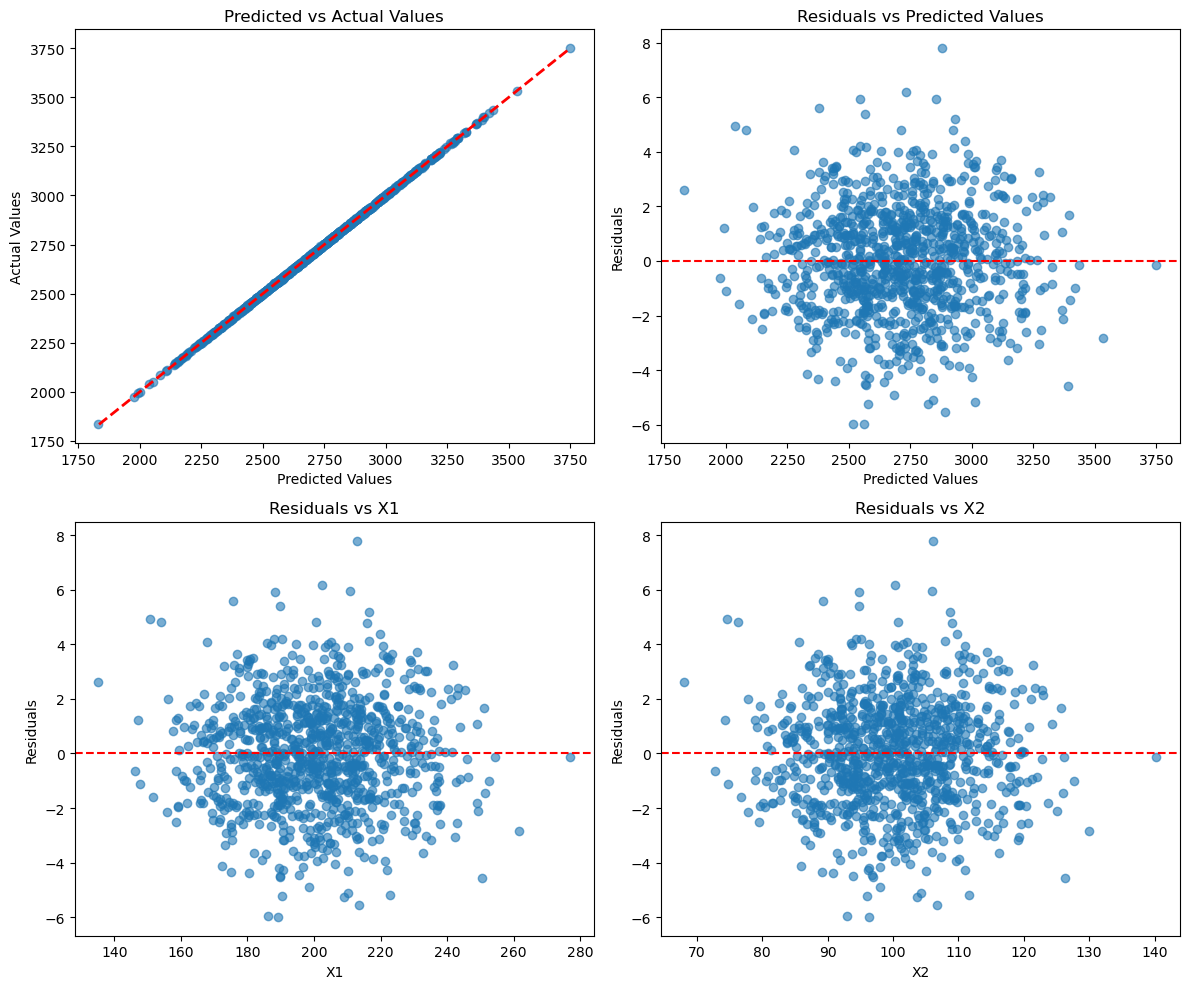

Correlation between residuals and predicted values: -0.000000
Correlation between residuals and X1: -0.000000
Correlation between residuals and X2: -0.000000
Linearity assumption: SATISFIED

ANSWER 16: Linearity assumption satisfied? Yes

QUESTION 17: Durbin-Watson Statistic
Durbin-Watson statistic: 2.021963

ANSWER 17: Durbin-Watson statistic = 2.022

QUESTION 18: Independence Assumption Check
Durbin-Watson value: 2.021963
Interpretation:
- DW ≈ 2: No autocorrelation
- DW < 2: Positive autocorrelation
- DW > 2: Negative autocorrelation
Independence assumption: SATISFIED (no significant autocorrelation)

ANSWER 18: Independence assumption satisfied? Yes

QUESTION 19: Homoscedasticity Check


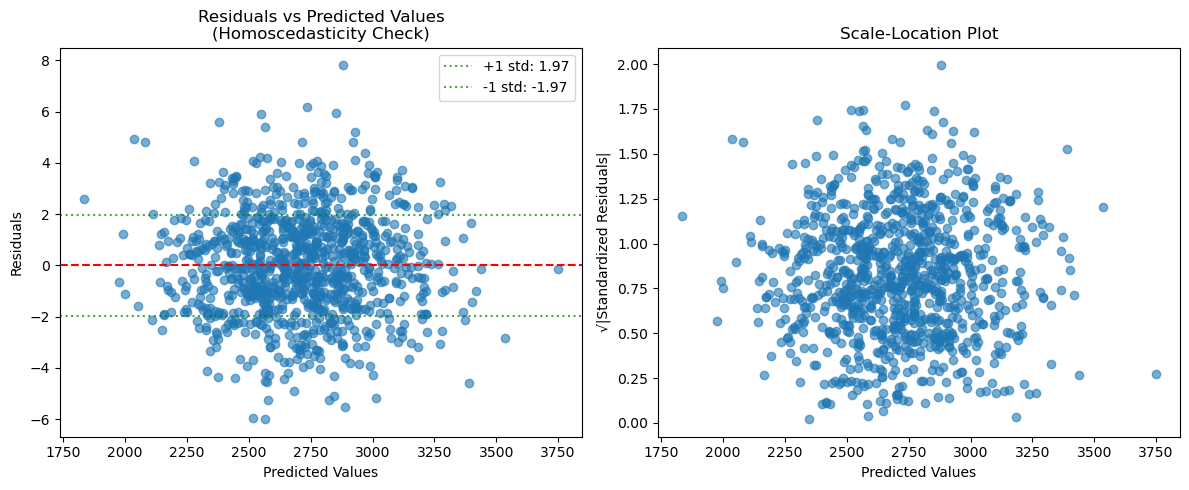

Breusch-Pagan test:
  LM Statistic: 0.243758
  LM p-value: 0.885256
  F Statistic: 0.121543
  F p-value: 0.885566
Homoscedasticity: SATISFIED (constant variance)

ANSWER 19: Homoscedasticity exhibited? Yes

QUESTION 20: Normality of Residuals Check


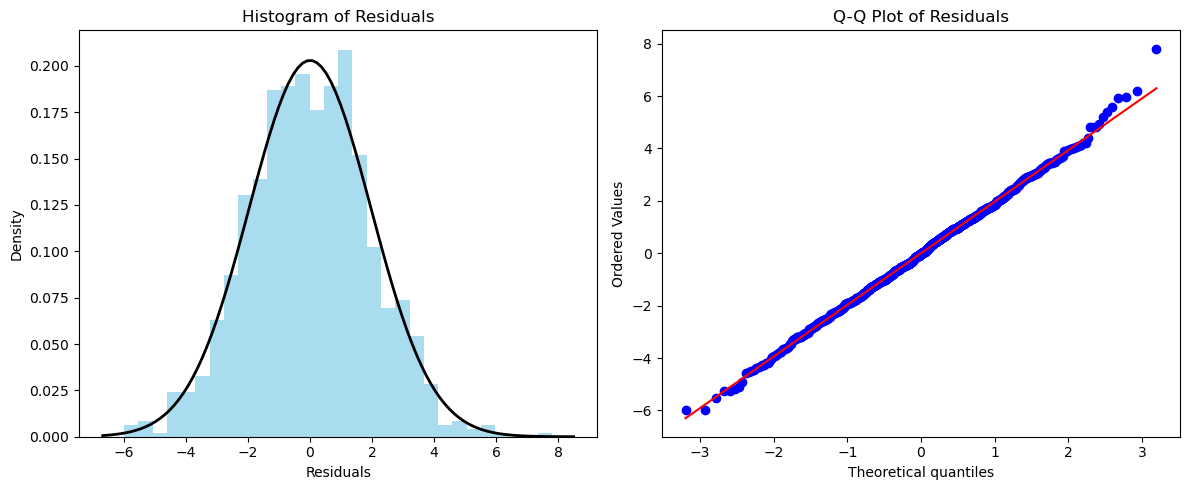

Shapiro-Wilk test:
  Statistic: 0.998699
  p-value: 0.687580

D'Agostino's normality test:
  Statistic: 1.860394
  p-value: 0.394476
Normality of residuals: SATISFIED

ANSWER 20: Normality of residuals exhibited? Yes

QUESTION 21: Variance Inflation Factor (VIF) Analysis
VIF Values:
  Feature        VIF
0   const  106.03376
1      X1   96.74111
2      X2   96.74111

Number of predictor variables with VIF > 10: 2

Correlation matrix between predictors:
          X1        X2
X1  1.000000  0.994818
X2  0.994818  1.000000

ANSWER 21: Number of predictor variables with VIF > 10 = 2

SUMMARY OF ANSWERS FOR APMM8-dataset05.csv
15. Intercept value: 4.576
16. Linearity assumption satisfied: Yes
17. Durbin-Watson statistic: 2.022
18. Independence assumption satisfied: Yes
19. Homoscedasticity exhibited: Yes
20. Normality of residuals exhibited: Yes
21. Number of predictors with VIF > 10: 2


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the dataset
data = pd.read_csv('APMM8-dataset05.csv')

print("Dataset shape:", data.shape)
print("\nFirst few rows:")
print(data.head())
print("\nDataset info:")
print(data.info())

# Separate features and target
X = data[['X1', 'X2']]
y = data['y']

# Add constant for statsmodels (for intercept)
X_with_const = sm.add_constant(X)

# =============================================================================
# QUESTION 15: Multiple Linear Regression - Intercept
# =============================================================================

print("\n" + "="*60)
print("QUESTION 15: Multiple Linear Regression - Intercept")
print("="*60)

# Method 1: Using scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)
intercept_sklearn = model_sklearn.intercept_
coefficients_sklearn = model_sklearn.coef_

print(f"Scikit-learn Results:")
print(f"Intercept: {intercept_sklearn:.6f}")
print(f"Coefficient for X1: {coefficients_sklearn[0]:.6f}")
print(f"Coefficient for X2: {coefficients_sklearn[1]:.6f}")

# Method 2: Using statsmodels (more detailed statistics)
model_statsmodels = sm.OLS(y, X_with_const).fit()
print(f"\nStatsmodels Results:")
print(model_statsmodels.summary())

intercept_final = model_statsmodels.params['const']
print(f"\nANSWER 15: Intercept value = {intercept_final:.3f}")

# =============================================================================
# QUESTION 16: Linearity Assumption
# =============================================================================

print("\n" + "="*60)
print("QUESTION 16: Linearity Assumption Check")
print("="*60)

# Get predictions and residuals
y_pred = model_statsmodels.predict(X_with_const)
residuals = model_statsmodels.resid

# Create subplots for linearity check
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Predicted vs Actual values
axes[0, 0].scatter(y_pred, y, alpha=0.6)
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Predicted Values')
axes[0, 0].set_ylabel('Actual Values')
axes[0, 0].set_title('Predicted vs Actual Values')

# Plot 2: Residuals vs Predicted values
axes[0, 1].scatter(y_pred, residuals, alpha=0.6)
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residuals vs Predicted Values')

# Plot 3: Residuals vs X1
axes[1, 0].scatter(X['X1'], residuals, alpha=0.6)
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('X1')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals vs X1')

# Plot 4: Residuals vs X2
axes[1, 1].scatter(X['X2'], residuals, alpha=0.6)
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('X2')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs X2')

plt.tight_layout()
plt.show()

# Check for patterns in residuals
from scipy.stats import pearsonr

# Correlation between residuals and predicted values
corr_resid_pred, p_val_pred = pearsonr(y_pred, residuals)
print(f"Correlation between residuals and predicted values: {corr_resid_pred:.6f}")

# Correlation between residuals and X1
corr_resid_x1, p_val_x1 = pearsonr(X['X1'], residuals)
print(f"Correlation between residuals and X1: {corr_resid_x1:.6f}")

# Correlation between residuals and X2
corr_resid_x2, p_val_x2 = pearsonr(X['X2'], residuals)
print(f"Correlation between residuals and X2: {corr_resid_x2:.6f}")

# Linearity assessment
if abs(corr_resid_pred) < 0.1 and abs(corr_resid_x1) < 0.1 and abs(corr_resid_x2) < 0.1:
    linearity_satisfied = "Yes"
    print("Linearity assumption: SATISFIED")
else:
    linearity_satisfied = "No"
    print("Linearity assumption: NOT SATISFIED")

print(f"\nANSWER 16: Linearity assumption satisfied? {linearity_satisfied}")

# =============================================================================
# QUESTION 17: Durbin-Watson Statistic
# =============================================================================

print("\n" + "="*60)
print("QUESTION 17: Durbin-Watson Statistic")
print("="*60)

dw_statistic = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_statistic:.6f}")
print(f"\nANSWER 17: Durbin-Watson statistic = {dw_statistic:.3f}")

# =============================================================================
# QUESTION 18: Independence Assumption
# =============================================================================

print("\n" + "="*60)
print("QUESTION 18: Independence Assumption Check")
print("="*60)

print(f"Durbin-Watson value: {dw_statistic:.6f}")
print("Interpretation:")
print("- DW ≈ 2: No autocorrelation")
print("- DW < 2: Positive autocorrelation") 
print("- DW > 2: Negative autocorrelation")

# Rule of thumb: DW between 1.5 and 2.5 suggests no significant autocorrelation
if 1.5 <= dw_statistic <= 2.5:
    independence_satisfied = "Yes"
    print("Independence assumption: SATISFIED (no significant autocorrelation)")
else:
    independence_satisfied = "No"
    print("Independence assumption: NOT SATISFIED (significant autocorrelation detected)")

print(f"\nANSWER 18: Independence assumption satisfied? {independence_satisfied}")

# =============================================================================
# QUESTION 19: Homoscedasticity Check
# =============================================================================

print("\n" + "="*60)
print("QUESTION 19: Homoscedasticity Check")
print("="*60)

# Plot for homoscedasticity check
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Residuals vs Predicted values
axes[0].scatter(y_pred, residuals, alpha=0.6)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Predicted Values\n(Homoscedasticity Check)')

# Add lines to show constant variance
resid_std = residuals.std()
axes[0].axhline(y=resid_std, color='g', linestyle=':', alpha=0.7, label=f'+1 std: {resid_std:.2f}')
axes[0].axhline(y=-resid_std, color='g', linestyle=':', alpha=0.7, label=f'-1 std: {-resid_std:.2f}')
axes[0].legend()

# Scale-Location plot (standardized residuals vs predicted values)
standardized_residuals = residuals / np.std(residuals)
axes[1].scatter(y_pred, np.sqrt(np.abs(standardized_residuals)), alpha=0.6)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('√|Standardized Residuals|')
axes[1].set_title('Scale-Location Plot')

plt.tight_layout()
plt.show()

# Breusch-Pagan test for homoscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, X_with_const)
print(f"Breusch-Pagan test:")
print(f"  LM Statistic: {bp_test[0]:.6f}")
print(f"  LM p-value: {bp_test[1]:.6f}")
print(f"  F Statistic: {bp_test[2]:.6f}")
print(f"  F p-value: {bp_test[3]:.6f}")

# Homoscedasticity assessment (using p-value > 0.05 as threshold)
if bp_test[1] > 0.05:
    homoscedasticity = "Yes"
    print("Homoscedasticity: SATISFIED (constant variance)")
else:
    homoscedasticity = "No"
    print("Homoscedasticity: NOT SATISFIED (heteroscedasticity detected)")

print(f"\nANSWER 19: Homoscedasticity exhibited? {homoscedasticity}")

# =============================================================================
# QUESTION 20: Normality of Residuals
# =============================================================================

print("\n" + "="*60)
print("QUESTION 20: Normality of Residuals Check")
print("="*60)

# Create subplots for normality check
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram with normal curve
axes[0].hist(residuals, bins=30, density=True, alpha=0.7, color='skyblue')
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(residuals), np.std(residuals))
axes[0].plot(x, p, 'k', linewidth=2)
axes[0].set_title('Histogram of Residuals')
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Density')

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Statistical tests for normality
shapiro_test = stats.shapiro(residuals)
normaltest_result = stats.normaltest(residuals)

print(f"Shapiro-Wilk test:")
print(f"  Statistic: {shapiro_test[0]:.6f}")
print(f"  p-value: {shapiro_test[1]:.6f}")

print(f"\nD'Agostino's normality test:")
print(f"  Statistic: {normaltest_result[0]:.6f}")
print(f"  p-value: {normaltest_result[1]:.6f}")

# Normality assessment (using p-value > 0.05 as threshold)
if shapiro_test[1] > 0.05 and normaltest_result[1] > 0.05:
    normality = "Yes"
    print("Normality of residuals: SATISFIED")
else:
    normality = "No"
    print("Normality of residuals: NOT SATISFIED")

print(f"\nANSWER 20: Normality of residuals exhibited? {normality}")

# =============================================================================
# QUESTION 21: VIF for Multicollinearity
# =============================================================================

print("\n" + "="*60)
print("QUESTION 21: Variance Inflation Factor (VIF) Analysis")
print("="*60)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(X_with_const.shape[1])]

print("VIF Values:")
print(vif_data)

# Count variables with VIF > 10
vif_over_10 = sum(vif_data['VIF'][1:] > 10)  # Exclude intercept
print(f"\nNumber of predictor variables with VIF > 10: {vif_over_10}")

# Correlation matrix
correlation_matrix = X.corr()
print(f"\nCorrelation matrix between predictors:")
print(correlation_matrix)

print(f"\nANSWER 21: Number of predictor variables with VIF > 10 = {vif_over_10}")

# =============================================================================
# SUMMARY OF ALL ANSWERS
# =============================================================================

print("\n" + "="*60)
print("SUMMARY OF ANSWERS FOR APMM8-dataset05.csv")
print("="*60)

print(f"15. Intercept value: {intercept_final:.3f}")
print(f"16. Linearity assumption satisfied: {linearity_satisfied}")
print(f"17. Durbin-Watson statistic: {dw_statistic:.3f}")
print(f"18. Independence assumption satisfied: {independence_satisfied}")
print(f"19. Homoscedasticity exhibited: {homoscedasticity}")
print(f"20. Normality of residuals exhibited: {normality}")
print(f"21. Number of predictors with VIF > 10: {vif_over_10}")

Dataset shape: (1000, 3)

First few rows:
           X1         X2            y
0  202.483571  43.993554  8239.750970
1  199.308678  39.246337  7017.239968
2  203.238443  30.596304  5250.677873
3  207.615149  23.530632  4156.837827
4  198.829233  36.982233  6490.220271

QUESTION 1: Weight for X1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     9068.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:16:57   Log-Likelihood:                -7475.5
No. Observations:                1000   AIC:                         1.496e+04
Df Residuals:                     997   BIC:                         1.497e+04
Df Model:                           2                                  

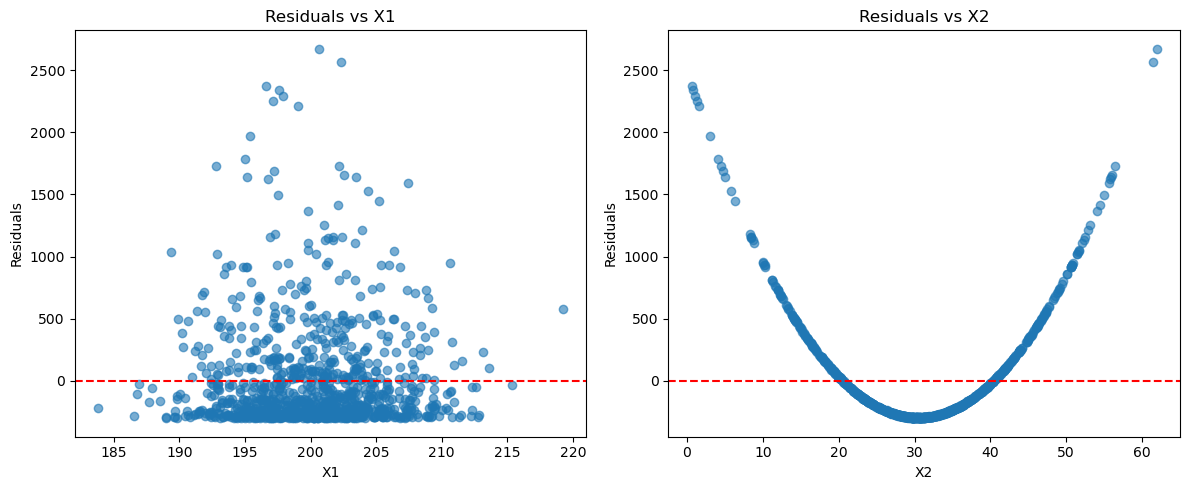

Visual inspection of residual plots:
If residuals show clear patterns (curves, funnels), linearity may be violated
Correlation X1 vs residuals: -0.000
Correlation X2 vs residuals: 0.000
Linearity assumption satisfied: Yes

QUESTION 3 & 4: Durbin-Watson Statistic & Independence
Durbin-Watson statistic: 1.990
No significant autocorrelation detected
Independence assumption satisfied: Yes

QUESTION 5: Homoscedasticity
Breusch-Pagan test p-value: 0.239
Homoscedasticity satisfied: Yes


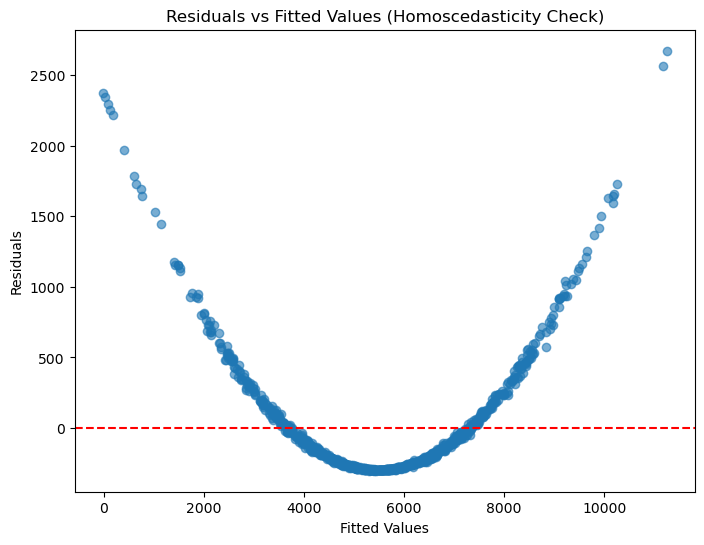


QUESTION 6: Normality of Residuals
Shapiro-Wilk test p-value: 0.000
Normality assumption satisfied: No


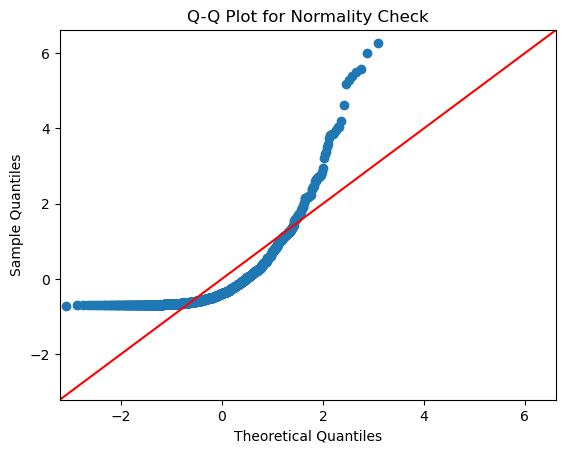


QUESTION 7: VIF for Multicollinearity
  Variable       VIF
0       X1  1.001635
1       X2  1.001635
Number of predictor variables with VIF > 10: 0

FINAL ANSWERS
1. Weight for X1: 11.927
2. Linearity assumption satisfied: Yes
3. Durbin-Watson statistic: 1.990
4. Independence assumption satisfied: Yes
5. Homoscedasticity satisfied: Yes
6. Normality assumption satisfied: No
7. Number of predictors with VIF > 10: 0


In [11]:
#1
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('APMM8-dataset04.csv')

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

# QUESTION 1: Weight for X1
print("\n" + "="*50)
print("QUESTION 1: Weight for X1")
print("="*50)

# Add constant and fit OLS model
X = df[['X1', 'X2']]
y = df['y']
X_with_const = sm.add_constant(X)

# Call sm.OLS() properly
model = sm.OLS(y, X_with_const).fit()

print(model.summary())

# Extract the coefficient for X1
x1_weight = model.params['X1']
print(f"\nWeight for X1: {x1_weight:.3f}")

# QUESTION 2: Linearity Assumption
print("\n" + "="*50)
print("QUESTION 2: Linearity Assumption")
print("="*50)

# Check residual plots for linearity
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Residuals vs X1
axes[0].scatter(df['X1'], model.resid, alpha=0.6)
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs X1')

# Residuals vs X2
axes[1].scatter(df['X2'], model.resid, alpha=0.6)
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_xlabel('X2')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs X2')

plt.tight_layout()
plt.show()

# Check for patterns in residuals visually
print("Visual inspection of residual plots:")
print("If residuals show clear patterns (curves, funnels), linearity may be violated")

# Alternative linearity check: correlation between predictors and residuals
corr_x1_resid = np.corrcoef(df['X1'], model.resid)[0, 1]
corr_x2_resid = np.corrcoef(df['X2'], model.resid)[0, 1]
print(f"Correlation X1 vs residuals: {corr_x1_resid:.3f}")
print(f"Correlation X2 vs residuals: {corr_x2_resid:.3f}")

# If correlations are close to 0, linearity is reasonable
linearity_holds = abs(corr_x1_resid) < 0.1 and abs(corr_x2_resid) < 0.1
print(f"Linearity assumption satisfied: {'Yes' if linearity_holds else 'No'}")

# QUESTION 3 & 4: Durbin-Watson Statistic & Independence
print("\n" + "="*50)
print("QUESTION 3 & 4: Durbin-Watson Statistic & Independence")
print("="*50)

dw_statistic = sm.stats.stattools.durbin_watson(model.resid)
print(f"Durbin-Watson statistic: {dw_statistic:.3f}")

# Interpretation
if 1.5 <= dw_statistic <= 2.5:
    independence_holds = True
    print("No significant autocorrelation detected")
else:
    independence_holds = False
    print("Potential autocorrelation detected")

print(f"Independence assumption satisfied: {'Yes' if independence_holds else 'No'}")

# QUESTION 5: Homoscedasticity
print("\n" + "="*50)
print("QUESTION 5: Homoscedasticity")
print("="*50)

# Breusch-Pagan test
bp_test = sm.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog)
bp_p_value = bp_test[1]
print(f"Breusch-Pagan test p-value: {bp_p_value:.3f}")

homoscedasticity_holds = bp_p_value > 0.05
print(f"Homoscedasticity satisfied: {'Yes' if homoscedasticity_holds else 'No'}")

# Plot residuals vs fitted values
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, model.resid, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Homoscedasticity Check)')
plt.show()

# QUESTION 6: Normality of Residuals
print("\n" + "="*50)
print("QUESTION 6: Normality of Residuals")
print("="*50)

# Shapiro-Wilk test
shapiro_stat, shapiro_p = stats.shapiro(model.resid)
print(f"Shapiro-Wilk test p-value: {shapiro_p:.3f}")

normality_holds = shapiro_p > 0.05
print(f"Normality assumption satisfied: {'Yes' if normality_holds else 'No'}")

# Q-Q plot
sm.qqplot(model.resid, line='45', fit=True)
plt.title('Q-Q Plot for Normality Check')
plt.show()

# QUESTION 7: VIF for Multicollinearity
print("\n" + "="*50)
print("QUESTION 7: VIF for Multicollinearity")
print("="*50)

# Calculate VIF for each predictor (excluding intercept)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(1, X_with_const.shape[1])]

print(vif_data)

vif_above_10 = sum(vif_data['VIF'] > 10)
print(f"Number of predictor variables with VIF > 10: {vif_above_10}")

print("\n" + "="*50)
print("FINAL ANSWERS")
print("="*50)
print(f"1. Weight for X1: {x1_weight:.3f}")
print(f"2. Linearity assumption satisfied: {'Yes' if linearity_holds else 'No'}")
print(f"3. Durbin-Watson statistic: {dw_statistic:.3f}")
print(f"4. Independence assumption satisfied: {'Yes' if independence_holds else 'No'}")
print(f"5. Homoscedasticity satisfied: {'Yes' if homoscedasticity_holds else 'No'}")
print(f"6. Normality assumption satisfied: {'Yes' if normality_holds else 'No'}")
print(f"7. Number of predictors with VIF > 10: {vif_above_10}")

In [ ]:
#2
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import matplotlib.pyplot as plt

def analyze_dataset(filename, dataset_name):
    print("="*70)
    print(f"ANALYZING {dataset_name}")
    print("="*70)
    
    # Load the dataset
    df = pd.read_csv(filename)
    
    print(f"Dataset shape: {df.shape}")
    print(f"\nFirst few rows:")
    print(df.head())
    
    # Separate features and target
    X = df[['X1', 'X2']]
    y = df['y']
    X_with_const = sm.add_constant(X)
    
    # Fit OLS model
    model = sm.OLS(y, X_with_const).fit()
    
    # QUESTION 1/8: Weights
    print(f"\nREGRESSION RESULTS:")
    print(model.summary())
    
    x1_weight = model.params['X1']
    x2_weight = model.params['X2']
    
    # QUESTION 2/9: Linearity Assumption
    corr_x1_resid = np.corrcoef(df['X1'], model.resid)[0, 1]
    corr_x2_resid = np.corrcoef(df['X2'], model.resid)[0, 1]
    linearity_holds = abs(corr_x1_resid) < 0.1 and abs(corr_x2_resid) < 0.1
    
    # QUESTION 3/10 & 4/11: Durbin-Watson & Independence
    dw_statistic = sm.stats.stattools.durbin_watson(model.resid)
    independence_holds = 1.5 <= dw_statistic <= 2.5
    
    # QUESTION 5/12: Homoscedasticity
    bp_test = sm.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog)
    bp_p_value = bp_test[1]
    homoscedasticity_holds = bp_p_value > 0.05
    
    # QUESTION 6/13: Normality of Residuals
    shapiro_stat, shapiro_p = stats.shapiro(model.resid)
    normality_holds = shapiro_p > 0.05
    
    # QUESTION 7/14: VIF for Multicollinearity
    vif_values = [variance_inflation_factor(X_with_const.values, i) 
                 for i in range(1, X_with_const.shape[1])]
    vif_above_10 = sum(vif > 10 for vif in vif_values)
    
    # Print results
    print(f"\nDIAGNOSTIC RESULTS:")
    print(f"Weight for X1: {x1_weight:.3f}")
    print(f"Weight for X2: {x2_weight:.3f}")
    print(f"Correlation X1 vs residuals: {corr_x1_resid:.3f}")
    print(f"Correlation X2 vs residuals: {corr_x2_resid:.3f}")
    print(f"Linearity assumption satisfied: {'Yes' if linearity_holds else 'No'}")
    print(f"Durbin-Watson statistic: {dw_statistic:.3f}")
    print(f"Independence assumption satisfied: {'Yes' if independence_holds else 'No'}")
    print(f"Breusch-Pagan test p-value: {bp_p_value:.3f}")
    print(f"Homoscedasticity satisfied: {'Yes' if homoscedasticity_holds else 'No'}")
    print(f"Shapiro-Wilk test p-value: {shapiro_p:.3f}")
    print(f"Normality assumption satisfied: {'Yes' if normality_holds else 'No'}")
    print(f"VIF values: {[f'{vif:.3f}' for vif in vif_values]}")
    print(f"Number of predictors with VIF > 10: {vif_above_10}")
    
    # Create diagnostic plots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f'Diagnostic Plots - {dataset_name}', fontsize=16)
    
    # Residuals vs X1
    axes[0, 0].scatter(df['X1'], model.resid, alpha=0.6)
    axes[0, 0].axhline(y=0, color='red', linestyle='--')
    axes[0, 0].set_xlabel('X1')
    axes[0, 0].set_ylabel('Residuals')
    axes[0, 0].set_title('Residuals vs X1')
    
    # Residuals vs X2
    axes[0, 1].scatter(df['X2'], model.resid, alpha=0.6)
    axes[0, 1].axhline(y=0, color='red', linestyle='--')
    axes[0, 1].set_xlabel('X2')
    axes[0, 1].set_ylabel('Residuals')
    axes[0, 1].set_title('Residuals vs X2')
    
    # Residuals vs Fitted
    axes[1, 0].scatter(model.fittedvalues, model.resid, alpha=0.6)
    axes[1, 0].axhline(y=0, color='red', linestyle='--')
    axes[1, 0].set_xlabel('Fitted Values')
    axes[1, 0].set_ylabel('Residuals')
    axes[1, 0].set_title('Residuals vs Fitted Values')
    
    # Q-Q Plot
    sm.qqplot(model.resid, line='45', fit=True, ax=axes[1, 1])
    axes[1, 1].set_title('Q-Q Plot')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'x1_weight': x1_weight,
        'x2_weight': x2_weight,
        'linearity_holds': linearity_holds,
        'dw_statistic': dw_statistic,
        'independence_holds': independence_holds,
        'homoscedasticity_holds': homoscedasticity_holds,
        'normality_holds': normality_holds,
        'vif_above_10': vif_above_10
    }

# Analyze both datasets
print("COMPREHENSIVE REGRESSION ANALYSIS")
print("="*70)

# Analyze dataset 03
results_03 = analyze_dataset('APMM8-dataset03.csv', 'Dataset 03')

print("\n" + "="*70)
print("SUMMARY FOR DATASET 03")
print("="*70)
print(f"1. Weight for X1: {results_03['x1_weight']:.3f}")
print(f"2. Linearity assumption satisfied: {'Yes' if results_03['linearity_holds'] else 'No'}")
print(f"3. Durbin-Watson statistic: {results_03['dw_statistic']:.3f}")
print(f"4. Independence assumption satisfied: {'Yes' if results_03['independence_holds'] else 'No'}")
print(f"5. Homoscedasticity satisfied: {'Yes' if results_03['homoscedasticity_holds'] else 'No'}")
print(f"6. Normality assumption satisfied: {'Yes' if results_03['normality_holds'] else 'No'}")
print(f"7. Number of predictors with VIF > 10: {results_03['vif_above_10']}")

# Analyze dataset 04
results_04 = analyze_dataset('APMM8-dataset04.csv', 'Dataset 04')

print("\n" + "="*70)
print("SUMMARY FOR DATASET 04")
print("="*70)
print(f"8. Weight for X2: {results_04['x2_weight']:.3f}")
print(f"9. Linearity assumption satisfied: {'Yes' if results_04['linearity_holds'] else 'No'}")
print(f"10. Durbin-Watson statistic: {results_04['dw_statistic']:.3f}")
print(f"11. Independence assumption satisfied: {'Yes' if results_04['independence_holds'] else 'No'}")
print(f"12. Homoscedasticity satisfied: {'Yes' if results_04['homoscedasticity_holds'] else 'No'}")
print(f"13. Normality assumption satisfied: {'Yes' if results_04['normality_holds'] else 'No'}")
print(f"14. Number of predictors with VIF > 10: {results_04['vif_above_10']}")

print("\n" + "="*70)
print("FINAL ANSWERS FOR BOTH DATASETS")
print("="*70)
print("DATASET 03:")
print(f"1. {results_03['x1_weight']:.3f}")
print(f"2. {'Yes' if results_03['linearity_holds'] else 'No'}")
print(f"3. {results_03['dw_statistic']:.3f}")
print(f"4. {'Yes' if results_03['independence_holds'] else 'No'}")
print(f"5. {'Yes' if results_03['homoscedasticity_holds'] else 'No'}")
print(f"6. {'Yes' if results_03['normality_holds'] else 'No'}")
print(f"7. {results_03['vif_above_10']}")

print("\nDATASET 04:")
print(f"8. {results_04['x2_weight']:.3f}")
print(f"9. {'Yes' if results_04['linearity_holds'] else 'No'}")
print(f"10. {results_04['dw_statistic']:.3f}")
print(f"11. {'Yes' if results_04['independence_holds'] else 'No'}")
print(f"12. {'Yes' if results_04['homoscedasticity_holds'] else 'No'}")
print(f"13. {'Yes' if results_04['normality_holds'] else 'No'}")
print(f"14. {results_04['vif_above_10']}")